<a href="https://colab.research.google.com/github/dlopezuj/TFM_getrificacion_BCN/blob/main/Clustering_con_el_m%C3%A9todo_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación del clustering con el método K-means

In [1]:
# importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Lectura de los dataframes creados
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# realizamos la lectura del dataset generado
data_gentrification = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/output/df_union_factores.csv')

In [4]:
# visualizamos los resultados
data_gentrification

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,1,2015,9.1,11365,2.84,113.2,949,23379.571429,10.9975,2807.075,21.0,21.0,89.0,7.0,44.0,1739.0,9018
1,1,2016,9.6,11213,2.81,105.5,948,23866.761905,12.2700,2807.075,21.0,21.0,94.0,7.0,45.0,1740.0,9315
2,1,2017,10.5,11508,2.81,113.4,959,24383.952381,13.8950,3602.200,21.0,22.0,106.0,7.0,45.0,1725.0,10042
3,1,2018,9.3,11536,2.77,121.4,946,25485.809524,14.0175,4063.175,21.0,23.0,110.0,8.0,46.0,1569.0,10591
4,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.3250,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,73,2015,7.8,3622,2.51,38.0,717,30052.666667,8.9900,1795.525,5.0,0.0,2.0,0.0,0.0,148.0,2923
361,73,2016,8.2,3566,2.51,35.1,714,30739.095238,9.1225,1795.525,5.0,0.0,2.0,0.0,0.0,189.0,3144
362,73,2017,7.9,3551,2.51,43.2,716,30945.809524,10.1650,2083.500,5.0,0.0,2.0,0.0,0.0,165.0,3306
363,73,2018,6.6,3624,2.51,40.0,720,31907.428571,11.1450,2293.950,5.0,0.0,2.0,0.0,0.0,139.0,3485


In [5]:
# obtenemos los valores para los años 2019, 2018 y 2015 
data_gentrification_2019 = data_gentrification[(data_gentrification['Any'] == 2019)]
data_gentrification_2015 = data_gentrification[(data_gentrification['Any'] == 2015)]
data_gentrification_2018 = data_gentrification[(data_gentrification['Any'] == 2018)]

In [6]:
# visualizamos los resultados
data_gentrification_2019

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
4,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.325,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185
9,2,2019,6.7,6050,2.79,253.6,546,30316.444444,14.275,5067.000,110.0,5.0,151.0,2.0,57.0,1680.0,6414
14,3,2019,5.7,4043,2.90,130.4,1097,27120.090909,17.400,4884.000,95.0,1.0,86.0,2.0,5.0,682.0,4190
19,4,2019,6.3,6214,2.18,132.8,697,30888.538462,15.175,4419.775,145.0,11.0,130.0,2.0,23.0,562.0,8725
24,5,2019,6.3,5850,2.26,95.1,962,41890.550000,14.000,4946.525,137.0,6.0,27.0,7.0,10.0,861.0,11450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,69,2019,12.1,1621,2.49,52.9,563,47086.428571,17.350,5773.650,58.0,1.0,29.0,8.0,11.0,170.0,4529
349,70,2019,9.6,4034,2.51,110.5,878,28615.000000,11.350,3610.650,34.0,1.0,2.0,5.0,1.0,164.0,2572
354,71,2019,9.0,3083,2.95,51.9,1371,37504.833333,14.100,4345.350,77.0,0.0,12.0,2.0,1.0,228.0,4700
359,72,2019,7.1,3377,2.56,45.7,1113,35230.444444,11.925,3738.825,25.0,1.0,7.0,2.0,0.0,174.0,4641


In [7]:
data_gentrification_2015

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,1,2015,9.1,11365,2.84,113.2,949,23379.571429,10.9975,2807.075,21.0,21.0,89.0,7.0,44.0,1739.0,9018
5,2,2015,6.4,4147,2.36,142.2,454,26896.555556,11.2900,4255.375,13.0,5.0,103.0,1.0,44.0,2064.0,5255
10,3,2015,6.5,3535,2.20,103.3,1149,23761.181818,16.3325,4160.150,15.0,1.0,62.0,2.0,5.0,936.0,3399
15,4,2015,7.3,5707,2.26,113.6,695,26178.461538,12.7400,3677.250,21.0,9.0,82.0,2.0,17.0,525.0,7482
20,5,2015,7.5,5539,2.46,63.5,944,37344.500000,10.8925,3792.425,19.0,6.0,17.0,6.0,10.0,929.0,10099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,69,2015,13.4,1917,2.47,50.3,581,40525.857143,12.4175,5516.975,11.0,1.0,19.0,8.0,10.0,257.0,4237
345,70,2015,8.3,3743,2.74,68.8,891,25517.923077,8.2675,2270.225,12.0,1.0,2.0,4.0,1.0,218.0,1880
350,71,2015,9.1,3117,2.50,46.6,1496,32677.500000,9.9950,3125.150,11.0,0.0,8.0,2.0,1.0,209.0,3749
355,72,2015,7.9,3282,2.46,36.9,1147,31512.333333,9.3350,3119.300,4.0,1.0,3.0,1.0,0.0,188.0,3851


In [8]:
data_gentrification_2019.reset_index(drop=True, inplace=True)
data_gentrification_2018.reset_index(drop=True, inplace=True)
data_gentrification_2015.reset_index(drop=True, inplace=True)

In [9]:
# obtenemos la variación entre los años 2019 y 2015 y 2019 y 2018
df_incremento_2019_2015 = data_gentrification_2019 - data_gentrification_2015
df_incremento_2019_2018 = data_gentrification_2019 - data_gentrification_2018

In [10]:
df_incremento_2019_2018

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,0,1,-0.2,492,-0.28,4.5,9,1330.095238,0.3075,-501.875,151.0,0.0,25.0,0.0,1.0,620.0,594
1,0,1,-0.8,973,0.20,47.3,54,2048.888889,0.5025,-159.725,97.0,0.0,33.0,1.0,3.0,565.0,500
2,0,1,0.1,269,0.75,16.3,9,1253.090909,0.4825,-39.550,80.0,0.0,11.0,0.0,0.0,11.0,303
3,0,1,-0.2,327,-0.03,5.7,11,1820.538462,0.1525,-836.700,124.0,1.0,26.0,0.0,3.0,27.0,481
4,0,1,-2.1,201,-0.24,19.6,9,1756.000000,0.8575,302.850,118.0,0.0,6.0,0.0,0.0,-166.0,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,1,0.4,-74,-0.02,6.6,-3,2183.285714,1.4225,-254.325,47.0,0.0,4.0,0.0,0.0,-63.0,126
69,0,1,-0.9,324,-0.33,15.3,39,991.923077,0.3900,570.725,22.0,0.0,0.0,1.0,0.0,-23.0,250
70,0,1,-0.9,25,0.42,2.8,63,1209.750000,0.4425,282.075,66.0,0.0,3.0,0.0,0.0,-30.0,362
71,0,1,1.1,43,0.10,4.0,2,1468.111111,0.4025,231.200,21.0,0.0,4.0,0.0,0.0,14.0,209


In [11]:
# No usaremos todas las columnas, únicamente las que hemos identificado como importantes para realizar predicciones según el estado del arte
df_incremento_2019_2015_select = df_incremento_2019_2015[["Ocupacion_media(personas_domicilio)"	, "Alquiler_medio(Euros/m2 mes)", "precio_vivienda_Euros/m2", "renta_media_hogar(euros)", "Estudios_superiores", "Tasa_migracion_mil_hab"]]
df_incremento_2019_2018_select = df_incremento_2019_2015[["Ocupacion_media(personas_domicilio)"	, "Alquiler_medio(Euros/m2 mes)", "precio_vivienda_Euros/m2", "renta_media_hogar(euros)", "Estudios_superiores", "Tasa_migracion_mil_hab"]]
df_incremento_2019_2018_select

,Ocupacion_media(personas_domicilio),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,renta_media_hogar(euros),Estudios_superiores,Tasa_migracion_mil_hab
0,-0.35,3.3275,754.225,3436.333333,2167,12.7
1,0.43,2.9850,811.625,3419.888889,1159,111.4
2,0.70,1.0675,723.850,3358.909091,791,27.1
3,-0.08,2.4350,742.525,4710.076923,1243,19.2
4,-0.20,3.1075,1154.100,4546.050000,1351,31.6
...,...,...,...,...,...,...
68,0.02,4.9325,256.675,6560.571429,292,2.6
69,-0.23,3.0825,1340.425,3097.076923,692,41.7
70,0.45,4.1050,1220.200,4827.333333,951,5.3
71,0.10,2.5900,619.525,3718.111111,790,8.8


In [12]:
df_incremento_select_2019 = data_gentrification_2019[["Ocupacion_media(personas_domicilio)"	, "Alquiler_medio(Euros/m2 mes)", "precio_vivienda_Euros/m2", "renta_media_hogar(euros)", "Estudios_superiores", "Tasa_migracion_mil_hab"]]

In [13]:
df_incremento_select_2019.add_suffix('_2019')

,Ocupacion_media(personas_domicilio)_2019,Alquiler_medio(Euros/m2 mes)_2019,precio_vivienda_Euros/m2_2019,renta_media_hogar(euros)_2019,Estudios_superiores_2019,Tasa_migracion_mil_hab_2019
0,2.49,14.325,3561.300,26815.904762,11185,125.9
1,2.79,14.275,5067.000,30316.444444,6414,253.6
2,2.90,17.400,4884.000,27120.090909,4190,130.4
3,2.18,15.175,4419.775,30888.538462,8725,132.8
4,2.26,14.000,4946.525,41890.550000,11450,95.1
...,...,...,...,...,...,...
68,2.49,17.350,5773.650,47086.428571,4529,52.9
69,2.51,11.350,3610.650,28615.000000,2572,110.5
70,2.95,14.100,4345.350,37504.833333,4700,51.9
71,2.56,11.925,3738.825,35230.444444,4641,45.7


# Concatenamos los dataframes

In [14]:
df_final = pd.concat([df_incremento_2019_2015_select,df_incremento_2019_2018_select, df_incremento_select_2019], axis=1, ignore_index=True)


df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.35,3.3275,754.225,3436.333333,2167,12.7,-0.35,3.3275,754.225,3436.333333,2167,12.7,2.49,14.325,3561.300,26815.904762,11185,125.9
1,0.43,2.9850,811.625,3419.888889,1159,111.4,0.43,2.9850,811.625,3419.888889,1159,111.4,2.79,14.275,5067.000,30316.444444,6414,253.6
2,0.70,1.0675,723.850,3358.909091,791,27.1,0.70,1.0675,723.850,3358.909091,791,27.1,2.90,17.400,4884.000,27120.090909,4190,130.4
3,-0.08,2.4350,742.525,4710.076923,1243,19.2,-0.08,2.4350,742.525,4710.076923,1243,19.2,2.18,15.175,4419.775,30888.538462,8725,132.8
4,-0.20,3.1075,1154.100,4546.050000,1351,31.6,-0.20,3.1075,1154.100,4546.050000,1351,31.6,2.26,14.000,4946.525,41890.550000,11450,95.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.02,4.9325,256.675,6560.571429,292,2.6,0.02,4.9325,256.675,6560.571429,292,2.6,2.49,17.350,5773.650,47086.428571,4529,52.9
69,-0.23,3.0825,1340.425,3097.076923,692,41.7,-0.23,3.0825,1340.425,3097.076923,692,41.7,2.51,11.350,3610.650,28615.000000,2572,110.5
70,0.45,4.1050,1220.200,4827.333333,951,5.3,0.45,4.1050,1220.200,4827.333333,951,5.3,2.95,14.100,4345.350,37504.833333,4700,51.9
71,0.10,2.5900,619.525,3718.111111,790,8.8,0.10,2.5900,619.525,3718.111111,790,8.8,2.56,11.925,3738.825,35230.444444,4641,45.7


# Normalizamos los valores

In [15]:
# lo primero que haremos será normalizar los valores, para que todas las columnas se encuentren dentro del mismo rango

In [16]:
#scaler
scaler = StandardScaler()
scaler.fit(df_final)
df_incremento_norm = scaler.transform(df_final)

In [17]:
# visualizamos los resultados
df_incremento_norm

array([[-2.13332337e+00,  4.77174724e-01, -5.39771888e-01, ...,
        -9.76407181e-01,  8.25091016e-01,  1.93246491e+00],
       [ 2.17876157e+00,  7.48242991e-02, -3.92697974e-01, ...,
        -7.04494718e-01, -3.17481728e-03,  6.08005231e+00],
       [ 3.67140636e+00, -2.17775071e+00, -6.17600636e-01, ...,
        -9.52778824e-01, -3.89270649e-01,  2.07862108e+00],
       ...,
       [ 2.28932785e+00,  1.39053956e+00,  6.54178754e-01, ...,
        -1.46120094e-01, -3.00732486e-01, -4.70992161e-01],
       [ 3.54417941e-01, -3.89200279e-01, -8.84908754e-01, ...,
        -3.22788477e-01, -3.10975137e-01, -6.72362888e-01],
       [-5.30112305e-01, -5.12548585e-01, -7.27906071e-01, ...,
        -4.74082892e-01, -4.83190544e-01, -7.50312847e-01]])

Correlación

In [18]:
# Se obtienen resultados que a priori parecen no tener sentido
#df_incremento_norm.corr(method ='pearson')

In [19]:
#

Búsqueda de la cantidad óptima de clústers - método del codo

Text(0.5, 1.0, 'Elbow curve')

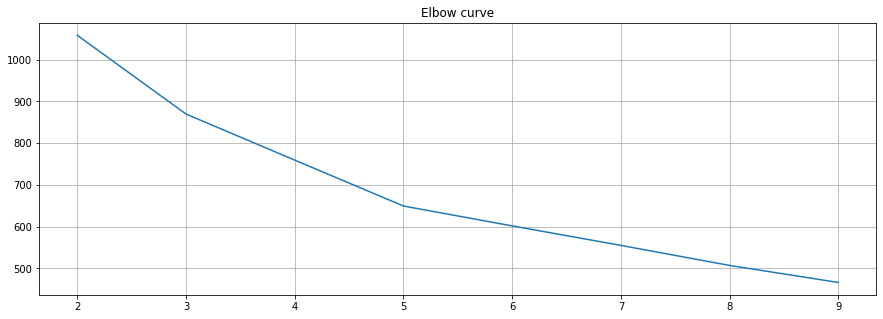

In [20]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_incremento_norm)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
# setting ticks for x-axis
ax = plt.axes()
ax.set_xticks([1,2,3,4,5, 6,7, 8,9, 10])
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

De la representación obtenemos el número óptimo podría tratarse de 3 ó 4 clústers

# Aplicación del Algotirmo Kmeans

In [21]:
# Definimos varios métodos para los valores de k = 2, 3 y 4 y obtenemos los resultados
k = 2
kmeans_model2 = KMeans(n_clusters=k).fit(df_incremento_norm)

In [22]:
k = 3
kmeans_model3 = KMeans(n_clusters=k).fit(df_incremento_norm)

In [23]:
k = 4
kmeans_model4 = KMeans(n_clusters=k).fit(df_incremento_norm)

In [24]:
kmeans_model2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [25]:
kmeans_model3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 0, 0], dtype=int32)

In [26]:
kmeans_output = data_gentrification_2019

In [27]:
kmeans_output['Kmeans_clusters_k2'] = kmeans_model2.labels_
kmeans_output['Kmeans_clusters_k3'] = kmeans_model3.labels_
kmeans_output['Kmeans_clusters_k4'] = kmeans_model4.labels_

<ipython-input-27-0acbf714fe19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_output['Kmeans_clusters_k2'] = kmeans_model2.labels_
<ipython-input-27-0acbf714fe19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_output['Kmeans_clusters_k3'] = kmeans_model3.labels_
<ipython-input-27-0acbf714fe19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [28]:
kmeans_output.head()

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores,Kmeans_clusters_k2,Kmeans_clusters_k3,Kmeans_clusters_k4
0,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.325,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185,1,1,2
1,2,2019,6.7,6050,2.79,253.6,546,30316.444444,14.275,5067.000,110.0,5.0,151.0,2.0,57.0,1680.0,6414,1,1,3
2,3,2019,5.7,4043,2.90,130.4,1097,27120.090909,17.400,4884.000,95.0,1.0,86.0,2.0,5.0,682.0,4190,1,1,1
3,4,2019,6.3,6214,2.18,132.8,697,30888.538462,15.175,4419.775,145.0,11.0,130.0,2.0,23.0,562.0,8725,1,1,2
4,5,2019,6.3,5850,2.26,95.1,962,41890.550000,14.000,4946.525,137.0,6.0,27.0,7.0,10.0,861.0,11450,1,1,2


In [30]:
Kmeans_result = kmeans_output.drop([	'Any',	'Tasa_natalidad_mil_hab',	'jovenes',	'Ocupacion_media(personas_domicilio)',	'Tasa_migracion_mil_hab',	'Densitat neta (hab/ha)',	'renta_media_hogar(euros)',	'Alquiler_medio(Euros/m2 mes)',	'precio_vivienda_Euros/m2',	'transporte',	'cultura',	'restaurantes',	'Parques',	'Hoteles',	'incidentes',	'Estudios_superiores'], axis=1)

In [31]:
# creamos un dataset con los resultados obtenidos. Este conjunto de datos contiene 73 filas (una para cada barrio) y en las columnas Kmeans, la asignación de cara barrio que ha realizado el algoritmo
Kmeans_result

,Codi_Barri,Kmeans_clusters_k2,Kmeans_clusters_k3,Kmeans_clusters_k4
0,1,1,1,2
1,2,1,1,3
2,3,1,1,1
3,4,1,1,2
4,5,1,1,2
...,...,...,...,...
68,69,1,0,0
69,70,0,0,1
70,71,1,1,1
71,72,0,0,1


## Escritura de datos a csv

In [ ]:
Kmeans_result.to_csv('/content/gdrive/MyDrive/Colab Notebooks/output/Kmeans_result_media_incremento_5años_1año_scaler.csv', index = False) 